In [45]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/rodneydavermann/Desktop/SQLAlchemy-Challenge/Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)



In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [9]:
# Calculate the date one year from the last date in data set
OneYear_LastDate = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", OneYear_LastDate)

Query Date : 2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
Date_Precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= OneYear_LastDate).all()
for record in Date_Precipitation:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Precipitation_df = pd.DataFrame(Date_Precipitation)
Precipitation_df.set_index("date", inplace=True)
Precipitation_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


<Figure size 720x360 with 0 Axes>

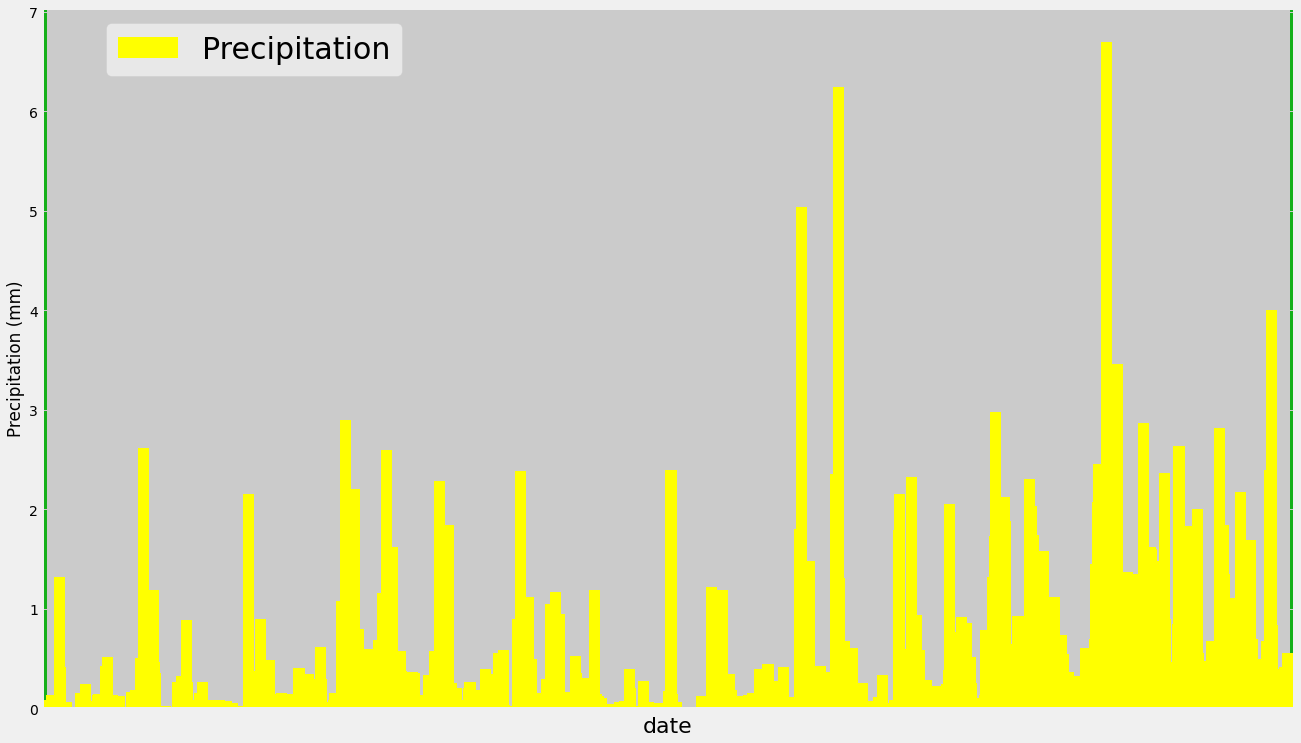

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data

# drop any missing data
Precipitation_df.dropna(how="any")

# bar chart size
fig = plt.figure(figsize = (10, 5))
 
# bar plot
ax= Precipitation_df.plot.bar(figsize=(20,12), width=20, color="yellow")
ax.set_xlabel("date", fontsize=22)
ax.set_facecolor("xkcd:green")
ax.set_xticklabels([])
plt.legend(["Precipitation"], fontsize=30)
plt.ylabel("Precipitation (mm)")
ax.get_legend().set_bbox_to_anchor((0.3, 1))
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number stations in the dataset
TotalNumber_Station = session.query(Station).group_by(Station.station).count()
TotalNumber_Station
#print(f"The total number stations in the dataset is":{TotalNumber_Station})

9

In [84]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
Active_Stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station)

# List the stations and the counts in descending order.
MostActive_Stations_Order = Active_Stations.order_by(func.count(Measurement.date).desc()).all()

#Display stations
MostActive_Stations_Order

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Lowest Temperature
Lowest_Temperature = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station==MostActive_Stations_Order[0][0]).all()

# Highest Temperature
Highest_Temperature = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station==MostActive_Stations_Order[0][0]).all()

# Average Temperature
Average_Temperature = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station==MostActive_Stations_Order[0][0]).all()
print("The Lowest Temperature is:", Lowest_Temperature[0][1])
print("The Lowest Temperature is:", Lowest_Temperature[0][1])
print("The Highest Temperature is:",Highest_Temperature[0][1] )
print("The Average Temperature is:", Average_Temperature[0][1])

Lowest_Temperature is: 54.0
Highest_Temperature is: 85.0
Average_Temperature is: 71.66378066378067
